# Final Project 1

---

### Anggota kelompok : 
1. Berliana Putri Betasari
2. Robi Dwiputra Satria

**PYTN-KS-09** <br>
**Studi Independen - Kampus Merdeka**

## Daftar Isi

* Perkenalan
* Import Pustaka
* Data Loading
* Data Cleaning
* Eksplorasi Data
* Data Preprocessing
* Pendefinisian model
* Pelatihan model
* Evaluasi Model
* Model Inference
* Kesimpulan

---
## Perkenalan

### Latar Belakang
Jasa transportasi saat ini merupakan sarana yang sangat penting di dalam
kehidupan masyarakat. Transportasi digunakan masyarakat untuk menunjang kelancaran
beraktifitas terutama di perkotaan, sehingga setiap manusia
membutuhkan adanya transportasi untuk bekerja,
bepergian, dan kegiatan lainnya. Dengan usaha jasa transportasi yang berkembang pesat, kebutuhan mobilitas
menjadi kebutuhan primer terutama di perkotaan. Kebutuhan masyarakat perkotaan akan jasa
transportasi yang tinggi namun tidak semua wilayah dapat dengan mudah
mengakses transportasi yang memadai, sehingga untuk mengatasi masalah tersebut, dilakukan penggabungan
transportasi dengan menggunakan internet agar lebih bersifat
praktis dan cepat dengan kehadiran taksi online.


Pada dasarnya untuk prediksi biaya pemesanan taksi online, label target merupakan nilai berkelanjutan. Maka diperlukan model berbasis regresi untuk memprediksi data-data baru. Model tersebut dapat dibentuk dengan memanfaatkan data-data historikal pemesanan taksi online sebelumnya dan mengetahui faktor-faktor yang berkorelasi kuat terhadap biaya untuk menunjang pembuatan model regresi linear.

### Data
Dataset ["Uber vs Lyft"](https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma) yang diperoleh dari kaggle berisikan terkait record data pemesanan taksi online Uber dan Lyft di Boston, MA. Dataset ini terdiri dari 57 kolom dan 693.071 data. Variabel independen (prediktor) mampu memprediksi variabel dependen (hasil) serta variabel mana yang memberi dampak signifikan terhadap hasil prediksi. Dalam analisis regresi linear ini, variabel dependen (hasil) yang menjadi target yaitu atribut Price/Biaya, sedangkan atribut lainnya merupakan variabel independen (prediktor).

### Tujuan
> Menganalisis sekumpulan data historikal pemesanan taksi online Uber dan Lyft sebelumnya dengan analisis regresi linear untuk memprediksi penentuan biaya taksi online beserta mengetahui faktor-faktor apa saja yang berpengaruh terhadap penentuan biaya taksi online tersebut.

---
## Import Pustaka

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import pickle

---
## Data Loading

Mengimport dataset yang akan digunakan

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')

Melihat 5 baris teratas dari dataset

In [3]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Melihat 5 baris terbawah dari dataset

In [4]:
df.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


Melihat dimensi (baris, kolom) dataset

In [5]:
baris, kolom = df.shape
print(baris, 'baris')
print(kolom, 'kolom')

693071 baris
57 kolom


Melihat informasi tipe data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

**Interpretasi:** Berdasarkan informasi dataset, terdapat 3 tipe data yang berbeda pada kolom yaitu tipe float sebanyak 29, integer sebanyak 17 dan object sebanyak 11.

Melihat deskripsi statistik tipe data numerik

In [7]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


Melihat deskripsi statistik tipe data kategorik

In [8]:
df.describe(include='O')

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
count,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071
unique,693071,31350,1,12,12,2,13,13,9,11,7
top,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-11-26 23:21:14,America/New_York,Financial District,Financial District,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Overcast,Mostly cloudy throughout the day.,cloudy
freq,1,156,693071,58857,58851,385663,55096,55096,218895,202340,218895


Melihat jumlah nilai unik untuk setiap atribut

In [9]:
# Mengetahui jumlah nilai unik setiap kolom
for i in df.columns:
    print('Jumlah nilai unik untuk atribut {}: {}'.format(i, len(df[i].unique())))

Jumlah nilai unik untuk atribut id: 693071
Jumlah nilai unik untuk atribut timestamp: 36179
Jumlah nilai unik untuk atribut hour: 24
Jumlah nilai unik untuk atribut day: 17
Jumlah nilai unik untuk atribut month: 2
Jumlah nilai unik untuk atribut datetime: 31350
Jumlah nilai unik untuk atribut timezone: 1
Jumlah nilai unik untuk atribut source: 12
Jumlah nilai unik untuk atribut destination: 12
Jumlah nilai unik untuk atribut cab_type: 2
Jumlah nilai unik untuk atribut product_id: 13
Jumlah nilai unik untuk atribut name: 13
Jumlah nilai unik untuk atribut price: 148
Jumlah nilai unik untuk atribut distance: 549
Jumlah nilai unik untuk atribut surge_multiplier: 7
Jumlah nilai unik untuk atribut latitude: 11
Jumlah nilai unik untuk atribut longitude: 12
Jumlah nilai unik untuk atribut temperature: 308
Jumlah nilai unik untuk atribut apparentTemperature: 319
Jumlah nilai unik untuk atribut short_summary: 9
Jumlah nilai unik untuk atribut long_summary: 11
Jumlah nilai unik untuk atribut pre

Melihat nilai unik pada kolom **cab_type**

In [10]:
df['cab_type'].unique()

array(['Lyft', 'Uber'], dtype=object)

Melihat jumlah data pada kolom **cab_type**

In [11]:
df['cab_type'].value_counts()

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64

Melihat perbedaan jumlah proporsi data pada kolom **cab_type**

In [12]:
df['cab_type'].value_counts(normalize=True)

Uber    0.556455
Lyft    0.443545
Name: cab_type, dtype: float64

Melakukan pengecekan duplikasi data

In [13]:
df[df.duplicated()]

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime


Tidak terdapat duplikasi data

In [14]:
df.duplicated().sum()

0

---
## Data Cleaning

Melihat missing values

In [15]:
df[df.isna().any(axis=1)]

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
18,fa5fb705-03a0-4eb9-82d9-7fe80872f754,1.543674e+09,14,1,12,2018-12-01 14:13:04,America/New_York,North End,West End,Uber,...,0.0000,1543683600,31.71,1543658400,44.66,1543690800,28.06,1543658400,43.99,1543690800
31,eee70d94-6706-4b95-a8ce-0e34f0fa8f37,1.543795e+09,23,2,12,2018-12-02 23:52:56,America/New_York,Beacon Hill,South Station,Uber,...,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
40,7f47ff53-7cf2-4a6a-8049-83c90e042593,1.543524e+09,20,29,11,2018-11-29 20:38:05,America/New_York,North Station,Fenway,Uber,...,0.0000,1543510800,35.15,1543550400,44.66,1543510800,30.98,1543550400,38.30,1543510800
60,43abdbe4-ab9e-4f39-afdc-31cfa375dc25,1.544732e+09,20,13,12,2018-12-13 20:10:16,America/New_York,North End,West End,Uber,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
69,80db1c49-9d51-4575-a4f4-1ec23b4d3e31,1.543583e+09,13,30,11,2018-11-30 13:08:03,America/New_York,North End,Beacon Hill,Uber,...,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693025,70ad9983-92dd-4cdf-af16-732e7e9ee9d0,1.544887e+09,15,15,12,2018-12-15 15:15:13,America/New_York,South Station,Beacon Hill,Uber,...,0.0081,1544893200,39.68,1544929200,54.46,1544896800,36.43,1544929200,53.79,1544896800
693047,84e05ef0-781a-4bd5-a593-bbbf659d4ba0,1.543456e+09,1,29,11,2018-11-29 01:47:08,America/New_York,Haymarket Square,Beacon Hill,Uber,...,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
693049,885ef635-299e-45cf-8052-c45a39e9822a,1.543456e+09,1,29,11,2018-11-29 01:47:08,America/New_York,North End,Beacon Hill,Uber,...,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
693060,50a7b6be-ed2a-4a11-8d36-73bd977ad66a,1.543728e+09,5,2,12,2018-12-02 05:28:04,America/New_York,Theatre District,Haymarket Square,Uber,...,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000


Melihat jumlah missing values

In [16]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Terdapat 55095 baris yang merupakan missing values (nilai kosong) pada kolom **price**

In [17]:
df.isnull().sum().sum()

55095

**Analisis**: Berdasarkan output missing values, terlihat bahwa pada kolom **'price'** memiliki nilai kosong yang jumlahnya cukup besar. Kolom **price** merupakan variabel yang dipengaruhi atau yang akan dijadikan sebagai data target. Maka, baris pada kolom **'price'** sebagai variabel independen yang memiliki nilai kosong akan dilakukan dropout data.

Melakukan drop missing value

In [18]:
df.dropna(axis=0, inplace=True)

Mengecek kembali missing values

In [19]:
print('Jumlah missing values =', 
      df.isnull().sum().sum())

Jumlah missing values = 0


Dapat dilihat bahwa pada dataset tidak terdapat missing values

#### Drop Features

Melakukan drop pada beberapa fitur berdasarkan kondisi tertentu

Menghapus atribut yang tidak dibutuhkan

In [20]:
df = df.drop(['id', 'timestamp', 'timezone', 'datetime', 'product_id', 'long_summary', 'visibility',
              'visibility.1', 'sunriseTime', 'sunsetTime', 'windGustTime', 'uvIndexTime'], axis=1)

Mengecek korelasi fitur **'temperature'** terhadap fitur target **('price')**

In [21]:
temp_cols = ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin',
            'apparentTemperatureMax','price']

In [22]:
# membentuk data frame terkait suhu
df_temp = df[temp_cols]

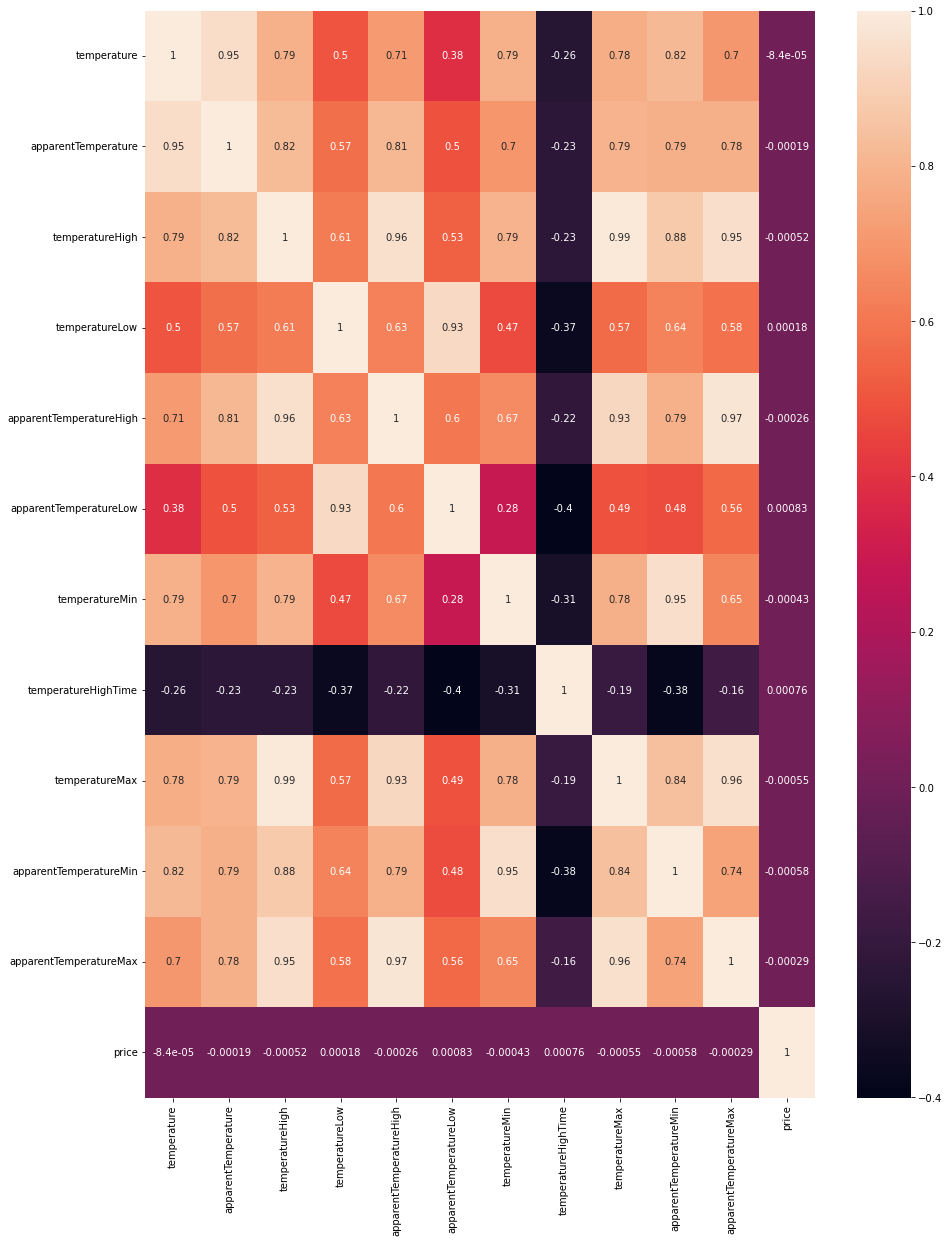

In [23]:
# membuat matriks korelasi-R suhu terhadap biaya
plt.figure(figsize=(15,20))
sns.heatmap(df_temp.corr(), annot=True)
plt.show()

Dapat terlihat bahwa semua fitur terkait suhu memiliki korelasi yang lemah dengan fitur target ('price'), maka fitur tersebut akan dihapus karena tidak akan memberikan pengaruh yang begitu besar terhadap pemodelan.

In [24]:
# menghapus fitur terkait suhu

df = df.drop(['temperature','apparentTemperature','temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 
             'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 
             'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 
             'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime'], axis=1)

In [25]:
# mengetahui ukuran dimensi(baris, kolom)
df.shape

(637976, 27)

Mengecek korelasi fitur **'climate'** terhadap fitur target **('price')**

In [26]:
climate_cols = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
                'windGust', 'dewPoint', 'pressure', 'windBearing',
                'cloudCover', 'uvIndex', 'ozone', 'moonPhase', 'precipIntensityMax', 'price']

In [27]:
# membentuk data frame terkait iklim
df_climate = df[climate_cols]

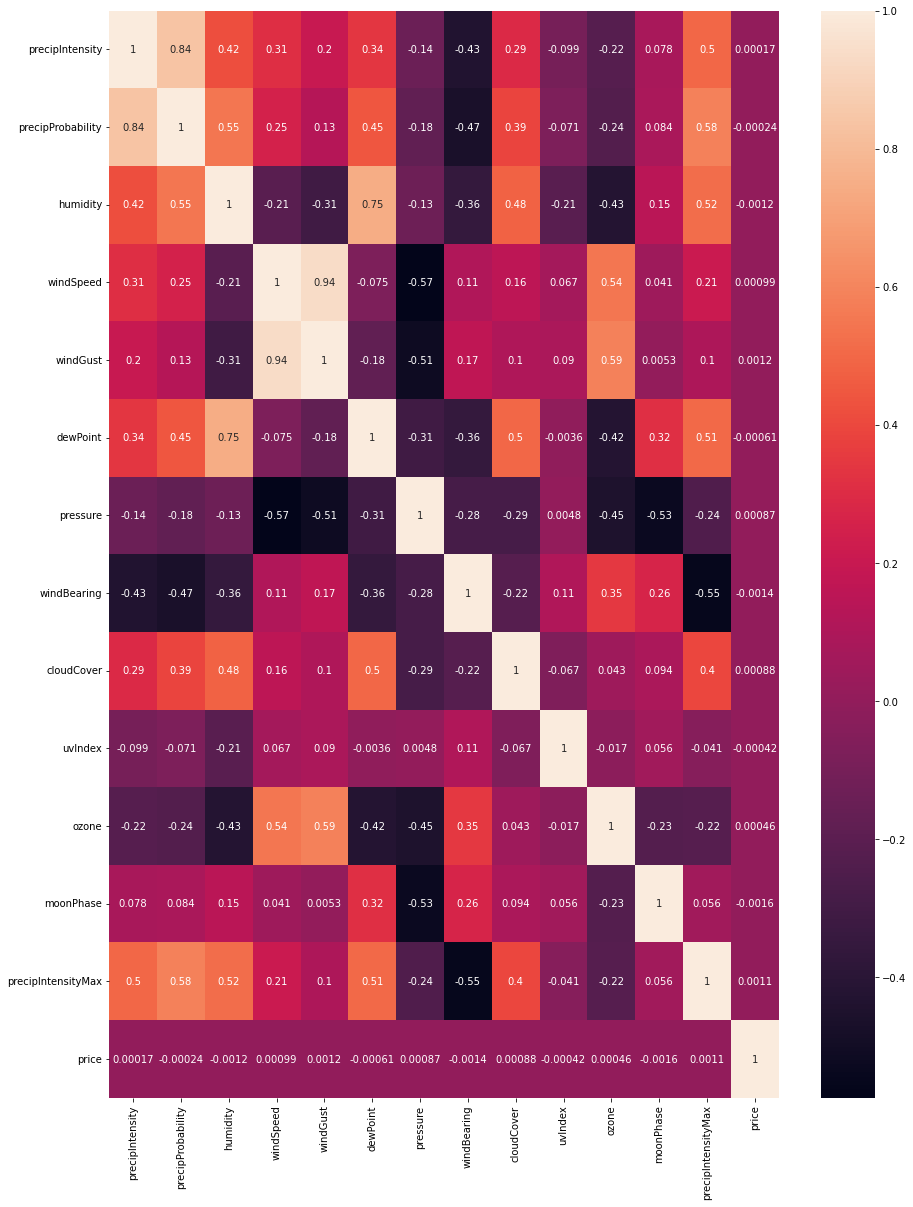

In [28]:
# membuat matriks korelasi-R iklim terhadap biaya
plt.figure(figsize=(15,20))
sns.heatmap(df_climate.corr(), annot=True)
plt.show()

**Analisis:** Dapat terlihat bahwa semua fitur terkait iklim memiliki korelasi yang lemah dengan fitur target ('price'), maka fitur tersebut akan dihapus karena tidak akan memberikan pengaruh yang begitu besar terhadap pemodelan.

In [29]:
# menghapus fitur terkait iklim
df = df.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust',
              'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
              'precipIntensityMax'], axis=1)

In [30]:
# mengetahui ukuran dimensi (baris, kolom)
df.shape

(637976, 14)

---
## Eksplorasi Data

Mengelompokkan kolom sesuai dengan tipe data (numerikal, kategorikal)

In [31]:
# menggabungkan keseluruhan tipe data numerik yang tersimpan pada list 'num_cols'
num_cols = list(df.select_dtypes(include='number'))

# menggabungkan keseluruhan tipe data kategorik yang tersimpan pada list 'cat_cols'
cat_cols = list(df.select_dtypes(include='object'))

print(f"Fitur numerikal :\n{num_cols}")
print(f"Fitur kategorikal :\n{cat_cols}")

Fitur numerikal :
['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude']
Fitur kategorikal :
['source', 'destination', 'cab_type', 'name', 'short_summary', 'icon']


In [32]:
# menampilkan 5 baris pertama tipe data numerik
df[num_cols].head()

,hour,day,month,price,distance,surge_multiplier,latitude,longitude
0,9,16,12,5.0,0.44,1.0,42.2148,-71.033
1,2,27,11,11.0,0.44,1.0,42.2148,-71.033
2,1,28,11,7.0,0.44,1.0,42.2148,-71.033
3,4,30,11,26.0,0.44,1.0,42.2148,-71.033
4,3,29,11,9.0,0.44,1.0,42.2148,-71.033


In [33]:
# menampilkan 5 baris pertama tipe data kategorik
df[cat_cols].head()

,source,destination,cab_type,name,short_summary,icon
0,Haymarket Square,North Station,Lyft,Shared,Mostly Cloudy,partly-cloudy-night
1,Haymarket Square,North Station,Lyft,Lux,Rain,rain
2,Haymarket Square,North Station,Lyft,Lyft,Clear,clear-night
3,Haymarket Square,North Station,Lyft,Lux Black XL,Clear,clear-night
4,Haymarket Square,North Station,Lyft,Lyft XL,Partly Cloudy,partly-cloudy-night


Melakukan pengelompokkan data untuk mengetahui rata-rata biaya pemesanan Uber dan Lyft

In [34]:
df[['cab_type', 'price']].groupby('cab_type').agg('mean').sort_values(by='price', ascending=True)

,price
cab_type,
Uber,15.795343
Lyft,17.351396


Diperoleh bahwa pemesanan Uber memiliki biaya rata-rata yaitu 15.79 USD, sedangkan Lyft 17.35 USD.

Melakukan visualisasi data untuk mengetahui perbedaan proporsi data antara produk Uber dan Lyft

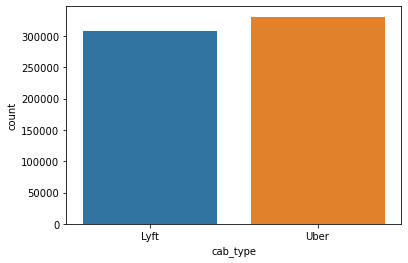

In [35]:
sns.countplot(x='cab_type', data=df)
plt.show()

Diperoleh bahwa proporsi data antara merk Lyft dan Uber tidak terlalu berbeda.

Melakukan crosstab (tabulasi silang) pada kolom **'cab_type'** dan **'destination'** untuk mengetahui jumlah pemesanan Lyft atau Uber pada setiap lokasi tujuan

In [36]:
pd.crosstab(df.cab_type, df.destination)

destination,Back Bay,Beacon Hill,Boston University,Fenway,Financial District,Haymarket Square,North End,North Station,Northeastern University,South Station,Theatre District,West End
cab_type,,,,,,,,,,,,
Lyft,25650,25464,25614,25620,26238,25613,25614,25326,25619,25620,25536,25494
Uber,27540,27376,27557,27546,27954,27558,27550,27251,27546,27539,27653,27498


Diperoleh bahwa setiap pemesanan Uber memiliki proporsi yang lebih tinggi, jika dibandingkan dengan pemesanan Lyft

Melakukan visualisasi data menggunakan barplot untuk mengetahui biaya rata-rata yang dibutuhkan untuk setiap jenis alat transportasi

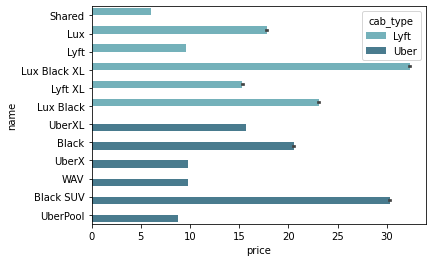

In [37]:
ax = sns.barplot(data=df, y='name', x='price', palette='GnBu_d', hue='cab_type')

Melakukan pengelompokkan data untuk mengetahui biaya dengan rata-rata tertinggi pada jenis transportasi yang digunakan ketikan melakukan pemesanan produk Lyft atau Uber

In [38]:
df.groupby(['cab_type', 'name'])[['price']].agg('mean')

price
cab_type name                   
Lyft     Lux           17.771240
         Lux Black     23.062468
         Lux Black XL  32.324086
         Lyft           9.610885
         Lyft XL       15.309363
         Shared         6.029893
Uber     Black         20.523786
         Black SUV     30.286763
         UberPool       8.752500
         UberX          9.765074
         UberXL        15.678144
         WAV            9.765019

In [39]:
# menampilkan jenis tranportasi dengan rata-rata biaya tertinggi untuk produk Uber dan Lyft
df_cab_max = df.groupby(['cab_type', 'name'])['price'].mean().sort_values(ascending=False).head(2)
df_cab_min = df.groupby(['cab_type', 'name'])['price'].mean().sort_values(ascending=True).head(2)

In [40]:
df_cab_max.to_frame()

,,price
cab_type,name,
Lyft,Lux Black XL,32.324086
Uber,Black SUV,30.286763


In [41]:
df_cab_min.to_frame()

,,price
cab_type,name,
Lyft,Shared,6.029893
Uber,UberPool,8.752500


**Analisis:** Berdasarkan visualisasi data diatas, dapat diperoleh bahwa penggunaan jenis produk akan berdampak pada biaya yang dibutuhkan untuk melakukan perjalanan.
- Pemesanan Lyft dengan produk Lux Black XL menghasilkan biaya rata-rata perjalanan tertinggi yaitu 32.32 USD, dan produk Shared menghasilkan biaya rata-rata perjalanan terendah yaitu 6.02 USD.
- Pemesanan Uber dengan produk Black SUV menghasilkan biaya rata-rata perjalanan tertinggi yaitu 30.28 USD, dan produk Uberpool menghasilkan biaya rata-rata perjalanan terendah yaitu 8.75 USD.

Membuat dataframe untuk produk Lyft dan Uber

In [42]:
# membuat dataframe produk Lyft
df_lyft = df[df['cab_type'].isin(['Lyft'])]
df_lyft.head(3)

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,short_summary,icon
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.033,Mostly Cloudy,partly-cloudy-night
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.033,Rain,rain
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,Clear,clear-night


In [43]:
# membuat dataframe produk Uber
df_uber = df[df['cab_type'].isin(['Uber'])]
df_uber.head(3)

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,short_summary,icon
12,22,30,11,North End,West End,Uber,UberXL,12.0,1.11,1.0,42.3647,-71.0542,Overcast,cloudy
13,10,13,12,North End,West End,Uber,Black,16.0,1.11,1.0,42.3647,-71.0542,Clear,clear-night
14,19,13,12,North End,West End,Uber,UberX,7.5,1.11,1.0,42.3647,-71.0542,Mostly Cloudy,partly-cloudy-day


Melakukan visualisasi data untuk mengetahui jumlah pemesanan Lyft berdasarkan kondisi cuaca

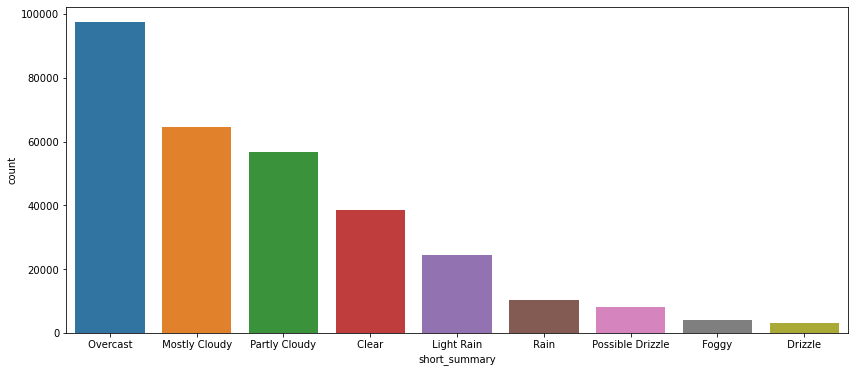

In [44]:
descending_order_lyft = df_lyft['short_summary'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(14,6))
sns.countplot(x='short_summary', data=df_lyft, order=descending_order_lyft)
plt.show()

Melakukan visualisasi data untuk mengetahui jumlah pemesanan Uber berdasarkan kondisi cuaca

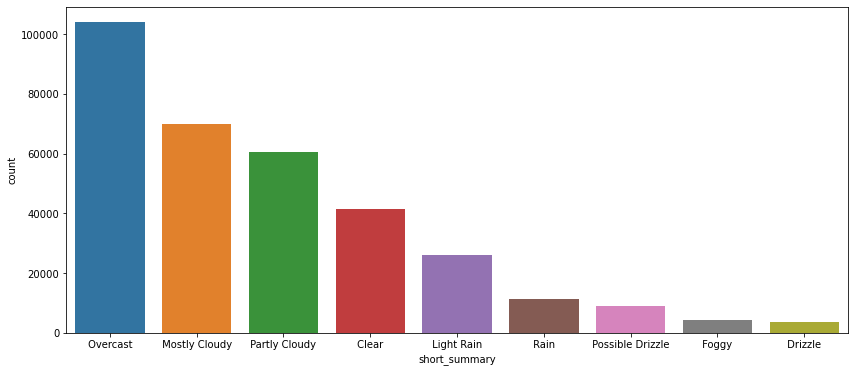

In [45]:
descending_order_uber = df_uber['short_summary'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(14,6))
sns.countplot(x='short_summary', data=df_uber, order=descending_order_uber)
plt.show()

Berdasarkan visualisasi data berdasarkan cuaca, diperoleh pemesanan transportasi ketika cuaca mendung, baik produk Lyft atau Uber, paling sering terjadi, hal ini dimungkinkan ketika konsumen hendak bepergian dapat mengantisipasi terjadinya hujan, sedangkan pemesanan terendah terjadi ketika cuaca gerimis.

#### Memvisualisasikan data jarak yang ditempuh terhadap harga untuk produk Lyft dan Uber

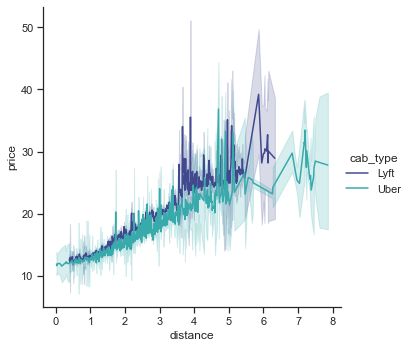

In [46]:
sns.set(style="ticks")

sns.relplot(x="distance", y="price",
            hue="cab_type",
            kind="line",
            palette="mako",
            data=df);

Berdasarkan visualisasi data diatas, terjadi korelasi positif antara jarak terhadap biaya, semakin besar jarak yang ditempuh, maka semakin besar pula biaya yang dibutuhkan untuk melakukan perjalanan.

Melakukan crosstab (tabulasi silang) pada kolom **'name'** dan **'surge_multiplier'** untuk mengetahui jumlah pemesanan produk Lyft atau Uber pada setiap lonjakan biaya.

In [47]:
pd.crosstab(df_lyft['name'], df_lyft['surge_multiplier'])

surge_multiplier,1.00,1.25,1.50,1.75,2.00,2.50,3.00
name,,,,,,,
Lux,47040,2217,1013,484,481,0,0
Lux Black,47040,2217,1013,484,481,0,0
Lux Black XL,47040,2217,1013,484,481,0,0
Lyft,47040,2217,1013,484,398,77,6
Lyft XL,47040,2217,1013,484,398,77,6
Shared,51233,0,0,0,0,0,0


Diperoleh bahwa, pengganda lonjakan tidak bervariasi untuk model mobil Shared karena hanya mencapai 1, sedangkan model mobil Lux cuenderung bervariasi karena mencapai 2.0, akan tetapi terdapat perbedaan pengganda lonjakan untuk Lyft dan Lyft XL yang  mencapai 2.50.

In [48]:
pd.crosstab(df_uber['name'], df_uber['surge_multiplier'])

surge_multiplier,1.0
name,
Black,55095
Black SUV,55096
UberPool,55091
UberX,55094
UberXL,55096
WAV,55096


Diperoleh bahwa, pengganda lonjakan hanya mencapai 1.0, untuk setiap model mobil di Uber

Melakukan pengelompokkan data kategorikal beserta data target ('price')

In [49]:
df_cat_cols = ['source', 'destination', 'cab_type', 'name', 'short_summary', 'icon', 'price']
df_cat = df[df_cat_cols]
df_cat.head()

,source,destination,cab_type,name,short_summary,icon,price
0,Haymarket Square,North Station,Lyft,Shared,Mostly Cloudy,partly-cloudy-night,5.0
1,Haymarket Square,North Station,Lyft,Lux,Rain,rain,11.0
2,Haymarket Square,North Station,Lyft,Lyft,Clear,clear-night,7.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,Clear,clear-night,26.0
4,Haymarket Square,North Station,Lyft,Lyft XL,Partly Cloudy,partly-cloudy-night,9.0


#### Menangani Outliers

(0.0, 100.0)

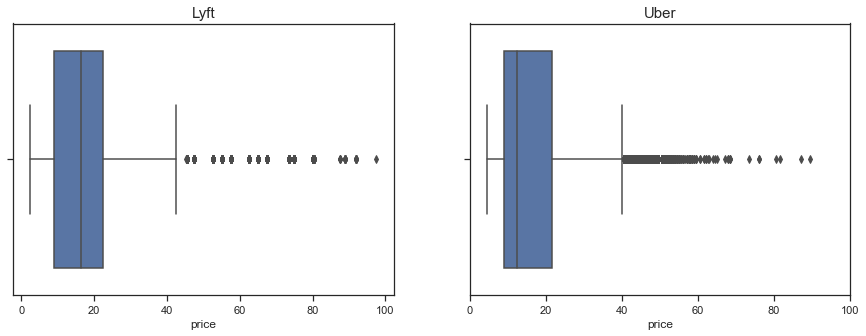

In [50]:
fig, (ax_1, ax_2) = plt.subplots(ncols=2, figsize=(15,5))
sns.boxplot(df_lyft['price'], ax=ax_1)
ax_1.set_title('Lyft', fontsize=15)

sns.boxplot(df_uber['price'], ax=ax_2)
ax_2.set_title('Uber', fontsize=15)
ax_2.set_xlim(0, 100)

#### Menganangi outliers pada produk Lyft

In [51]:
# melihat deskripsi statistik terkait biaya untuk produk lyft
df_lyft['price'].describe()

count    307408.000000
mean         17.351396
std          10.019171
min           2.500000
25%           9.000000
50%          16.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

In [52]:
# Menghitung nilai Q1 dan Q3 untuk produk lyft
Q1 = np.quantile(df_lyft['price'], .25)
Q3 = np.quantile(df_lyft['price'], .75)
# Menghitung nilai IQR untuk produk lyft
IQR = Q3 - Q1
print('Kuartil 1 = ', Q1)
print('Kuartil 3 = ', Q3)
print('IQR = ', IQR)

Kuartil 1 =  9.0
Kuartil 3 =  22.5
IQR =  13.5


In [53]:
# Menghitung ambang batas atas outlier
max_IQR = Q3 + 1.5 * IQR
print('IQR maksimum = ', max_IQR)

IQR maksimum =  42.75


Berdasarkan perhitungan IQR, dapat ditentukan bahwa IQR maksimum bernilai 42.75

In [54]:
# membuat dataframe untuk produk lyft yang melebihi nilai IQR maksimum
lyft_upper = df_lyft[(df_lyft['price']>42.75)]

Mengecek model mobil yang merupakan data outliers

In [55]:
lyft_upper['name'].unique()

array(['Lux Black', 'Lux Black XL', 'Lux', 'Lyft XL'], dtype=object)

In [56]:
lyft_upper['name'].value_counts()

Lux Black XL    3365
Lux Black        569
Lux              116
Lyft XL           42
Name: name, dtype: int64

Terlihat bahwa model mobil yang digunakan cenderung merupakan mobil mewah yaitu 'Lux Black XL', 'Lux Black' dan 'Lux'

#### Menganangi outliers pada produk Uber

In [57]:
# melihat deskripsi statistik terkait biaya untuk produk Uber
df_uber['price'].describe()

count    330568.000000
mean         15.795343
std           8.560300
min           4.500000
25%           9.000000
50%          12.500000
75%          21.500000
max          89.500000
Name: price, dtype: float64

In [58]:
# Menghitung nilai Q1 dan Q3 untuk produk lyft
Q1_2 = np.quantile(df_uber['price'], .25)
Q3_2 = np.quantile(df_uber['price'], .75)
# Menghitung nilai IQR untuk produk lyft
IQR_2 = Q3_2 - Q1_2
print('Kuartil 1 = ', Q1)
print('Kuartil 3 = ', Q3)
print('IQR = ', IQR)

Kuartil 1 =  9.0
Kuartil 3 =  22.5
IQR =  13.5


In [59]:
# Menghitung ambang batas atas outlier
max_IQR_2 = Q3_2 + 1.5 * IQR_2
print('IQR maksimum = ', max_IQR_2)

IQR maksimum =  40.25


Berdasarkan perhitungan IQR, dapat ditentukan bahwa IQR maksimum bernilai 40.25

In [60]:
# membuat dataframe untuk produk lyft yang melebihi nilai IQR maksimum
uber_upper = df_uber[(df_uber['price']>40.25)]

Mengecek model mobil yang merupakan data outliers

In [61]:
uber_upper['name'].unique()

array(['Black SUV', 'UberXL', 'Black', 'WAV', 'UberX', 'UberPool'],
      dtype=object)

In [62]:
uber_upper['name'].value_counts()

Black SUV    2746
Black         165
UberXL         99
WAV             2
UberX           2
UberPool        1
Name: name, dtype: int64

Terlihat bahwa model mobil yang digunakan cenderung merupakan mobil mewah yaitu 'Black SUV' dan 'Black'.

Melakukan visualisasi data untuk mengetahui pengaruh cuaca terhadap biaya pemesanan taksi Uber dan Lyft

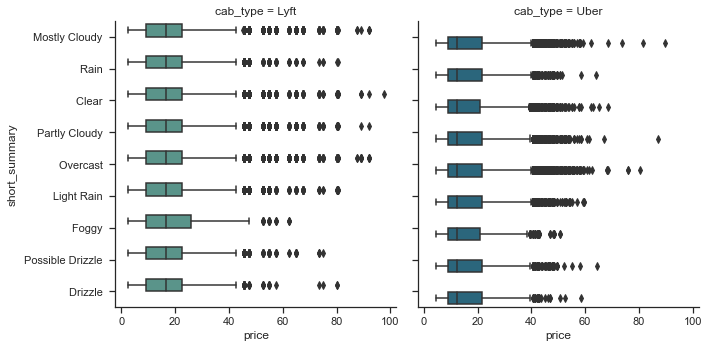

In [63]:
# plot terkait pengaruh cuaca terhadap harga
sns.catplot(x="price", y="short_summary", hue="cab_type", col="cab_type", data=df, kind="box", palette='crest')

Berdasarkan visualisasi data di atas, diperoleh bahwa kondisi cuaca mempengaruhi adanya kemunculan outlier pada biaya pemesanan taksi.

**Analisis:** Biaya perjalananan mengalami kenaikkan dari biasanya untuk model mobil yang berbeda. Rata-rata, kisaran biaya yang diperlukan untuk pemesanan produk Lyft dan Uber bervariasi, mulai dari sekitar 5 hingga 40 USD. Kemunculan outlier disebabkan oleh faktor-faktor seperti pengganda lonjakan pada mobil mewah untuk biaya perjalanan, bepergian ketika lalu lintas padat, dan kondisi cuaca yang buruk. Sehingga outlier dapat diabaikan.

In [64]:
df_lyft['price'].describe()

count    307408.000000
mean         17.351396
std          10.019171
min           2.500000
25%           9.000000
50%          16.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

In [65]:
# menampilkan 3 baris teratas
df.head(3)

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,short_summary,icon
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.033,Mostly Cloudy,partly-cloudy-night
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.033,Rain,rain
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,Clear,clear-night


Mengubah tipe data kategorik ke bilangan biner

In [66]:
le = LabelEncoder()

df_new_cat = df_cat.copy()
df_new_cat['source'] = le.fit_transform(df_new_cat['source'])
df_new_cat['destination'] = le.fit_transform(df_new_cat['destination'])
df_new_cat['cab_type'] = le.fit_transform(df_new_cat['cab_type'])
df_new_cat['name'] = le.fit_transform(df_new_cat['name'])
df_new_cat['short_summary'] = le.fit_transform(df_new_cat['short_summary'])
df_new_cat['icon'] = le.fit_transform(df_new_cat['icon'])

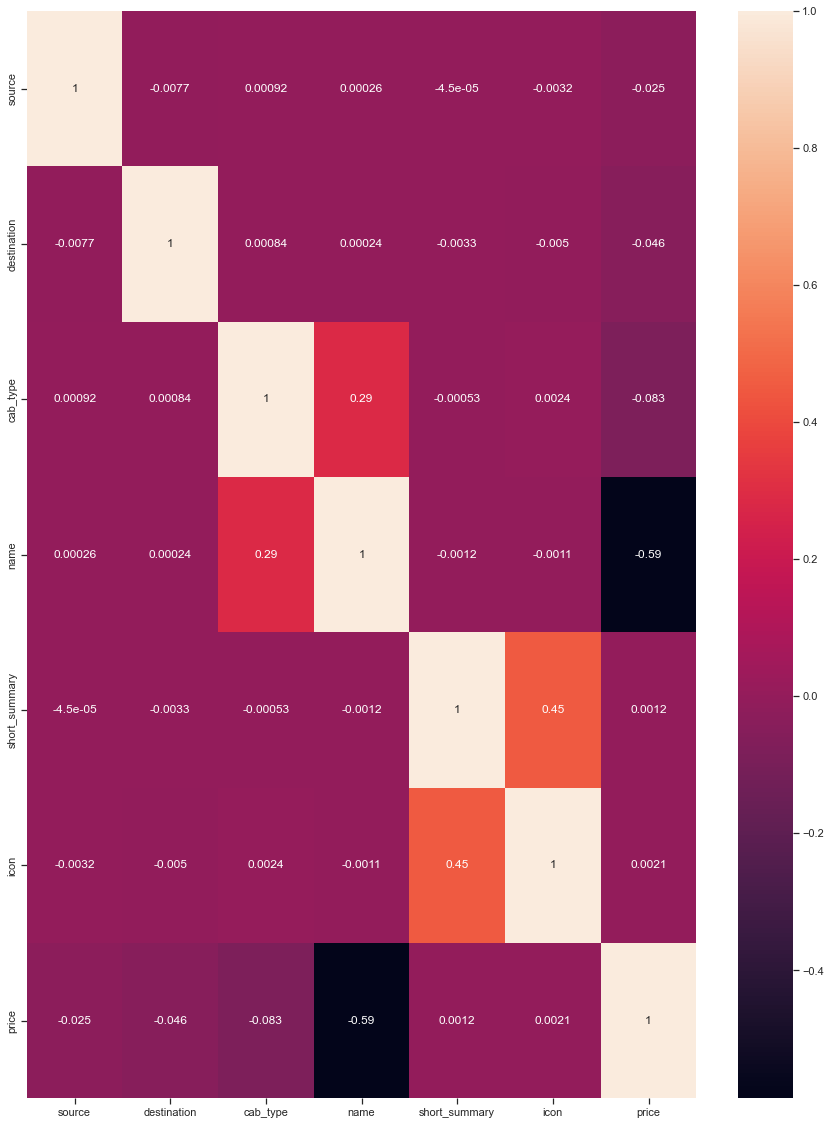

In [67]:
# membuat matriks korelasi-R data kategorik terhadap biaya
plt.figure(figsize=(15,20))
sns.heatmap(df_new_cat.corr(), annot=True)
plt.show()

**Analisis:** Fitur **'source'**, **'destination'**, **'cab_type'**, **'name'** memiliki korelasi negatif terhadap fitur target **'price'**

Melakukan pengecekan korelasi fitur kategorikal terhadap fitur target

In [68]:
# membuat matriks korelasi-R data numerik terhadap biaya
df_num_columns = ['hour', 'day', 'month', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'price']
df_num_cols = df[df_num_columns]

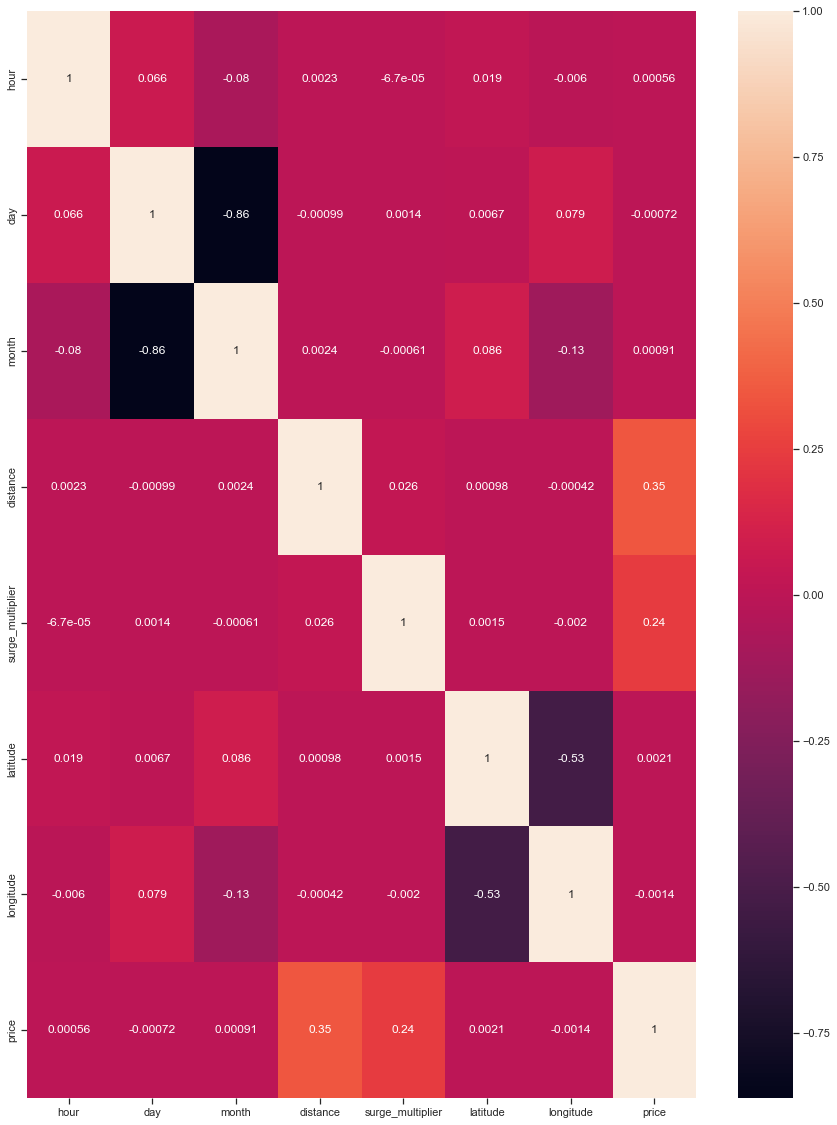

In [69]:
plt.figure(figsize=(15,20))
sns.heatmap(df_num_cols.corr(), annot=True)
plt.show()

**Analisis:** Fitur **'distance'** dan **'surge_multiplier'** memiliki korelasi positif terhadap fitur target **'price'**

Berdasarkan matriks korelasi, dapat ditentukan kolom yang berkorelasi tinggi terhadap data target **('price')** sebagai berikut:

- cab_type
- name
- source
- destination
- distance
- surge_multiplier
- price

In [70]:
# membuat datafram berdasarkan fitur yang berkolerasi tinggi terhadap data target
data = df[['cab_type', 'name', 'source', 'destination', 'distance', 'surge_multiplier', 'price']]
data

,cab_type,name,source,destination,distance,surge_multiplier,price
0,Lyft,Shared,Haymarket Square,North Station,0.44,1.0,5.0
1,Lyft,Lux,Haymarket Square,North Station,0.44,1.0,11.0
2,Lyft,Lyft,Haymarket Square,North Station,0.44,1.0,7.0
3,Lyft,Lux Black XL,Haymarket Square,North Station,0.44,1.0,26.0
4,Lyft,Lyft XL,Haymarket Square,North Station,0.44,1.0,9.0
...,...,...,...,...,...,...,...
693065,Uber,WAV,West End,North End,1.00,1.0,9.5
693066,Uber,UberXL,West End,North End,1.00,1.0,13.0
693067,Uber,UberX,West End,North End,1.00,1.0,9.5
693069,Uber,Black SUV,West End,North End,1.00,1.0,27.0


In [71]:
# membentuk dataframe numerik
data_num = data[['distance', 'surge_multiplier', 'price']]

In [72]:
data_num.head(3)

,distance,surge_multiplier,price
0,0.44,1.0,5.0
1,0.44,1.0,11.0
2,0.44,1.0,7.0


---
## Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model,
seperti pembagian data menjadi train-dev-test, transformasi data, dan proses-proses lain yang dibutuhkan.

In [73]:
# menampilkan 5 baris teratas
df_new_cat.head()

,source,destination,cab_type,name,short_summary,icon,price
0,5,7,0,7,4,5,5.0
1,5,7,0,2,8,6,11.0
2,5,7,0,5,0,1,7.0
3,5,7,0,4,0,1,26.0
4,5,7,0,6,6,5,9.0


In [74]:
# menghapus beberapa fitur pada data kategorik
df_new_cat = df_new_cat.drop(columns=['short_summary', 'icon', 'price'])

In [75]:
# menampilkan 3 baris teratas
data_num.head(3)

,distance,surge_multiplier,price
0,0.44,1.0,5.0
1,0.44,1.0,11.0
2,0.44,1.0,7.0


In [76]:
# melakukan penggabungan antara data kategorik dan numerik
data = pd.merge(df_new_cat, data_num, left_index=True, right_index=True)
data = data[['cab_type', 'name', 'source', 'destination', 'distance', 'surge_multiplier', 'price']]

In [77]:
# reset index
data.reset_index(drop=True, inplace=True)

Menampilkan nilai-nilai unik (setelah encoding) pada fitur kategorik beserta keterangannya

In [78]:
le = LabelEncoder()
le.fit(df_cat['cab_type'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"Keterangan label pada fitur {data.columns[0]}:\n{le_name_mapping}\n")

le.fit(df_cat['name'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"Keterangan label pada fitur {data.columns[1]}:\n{le_name_mapping}\n")

le.fit(df_cat['source'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"Keterangan label pada fitur {data.columns[2]}:\n{le_name_mapping}\n")

le.fit(df_cat['destination'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"Keterangan label pada fitur {data.columns[3]}:\n{le_name_mapping}\n")

Keterangan label pada fitur cab_type:
{'Lyft': 0, 'Uber': 1}

Keterangan label pada fitur name:
{'Black': 0, 'Black SUV': 1, 'Lux': 2, 'Lux Black': 3, 'Lux Black XL': 4, 'Lyft': 5, 'Lyft XL': 6, 'Shared': 7, 'UberPool': 8, 'UberX': 9, 'UberXL': 10, 'WAV': 11}

Keterangan label pada fitur source:
{'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3, 'Financial District': 4, 'Haymarket Square': 5, 'North End': 6, 'North Station': 7, 'Northeastern University': 8, 'South Station': 9, 'Theatre District': 10, 'West End': 11}

Keterangan label pada fitur destination:
{'Back Bay': 0, 'Beacon Hill': 1, 'Boston University': 2, 'Fenway': 3, 'Financial District': 4, 'Haymarket Square': 5, 'North End': 6, 'North Station': 7, 'Northeastern University': 8, 'South Station': 9, 'Theatre District': 10, 'West End': 11}



In [79]:
# menampilkan dimensi ukuran data (baris, kolom)
data.shape

(637976, 7)

In [80]:
# menampilkan 5 baris teratas
data.head()

,cab_type,name,source,destination,distance,surge_multiplier,price
0,0,7,5,7,0.44,1.0,5.0
1,0,2,5,7,0.44,1.0,11.0
2,0,5,5,7,0.44,1.0,7.0
3,0,4,5,7,0.44,1.0,26.0
4,0,6,5,7,0.44,1.0,9.0


Memisahkan variabel independen (prediktor) dan variabel dependen (hasil)

In [81]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

Membagi dataset menjadi data train dan data test, dengan ukuran test size = 20% dan train size = 80%

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Menampilkan ukuran dimensi baris data train dan data taest

In [83]:
print(f"Ukuran dimensi X_train: {X_train.shape}")
print(f"Ukuran dimensi X_test: {X_test.shape}")
print(f"Ukuran dimensi y_train: {y_train.shape}")
print(f"Ukuran dimensi y_test: {y_test.shape}")

Ukuran dimensi X_train: (510380, 6)
Ukuran dimensi X_test: (127596, 6)
Ukuran dimensi y_train: (510380,)
Ukuran dimensi y_test: (127596,)


Melakukan normalisasi data untuk membentuk distribusi normal dengan rata-rata bernilai 0, dan standar deviasi bernilai 1 menggunakan StandardScaler

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Membuat dataframe baru untuk kebutuhan visualisasi menggunakan data yang telah dilakukan scaling

In [85]:
X_test_vis = pd.DataFrame(X_test, columns = X.columns)

---
##  Pendefinisian Model

Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model.

#### Model pertama : Linear Regression
Model pertama yaitu Linear Regression. Model ini digunakan sebagai analisis regresi untuk mengetahui korelasi antar variabel.

In [86]:
model_linear = LinearRegression()

#### Model kedua : Decision Tree
Model kedua yaitu Decision Tree. Model ini mengamati fitur suatu objek dan melatih model dalam struktur pohon untuk memprediksi data di masa depan untuk menghasilkan output berkelanjutan yang bermakna. Parameter yang digunakan yakni random_state=0 untuk menjamin model agar menghasilkan nilai yang konsisten.

In [87]:
model_tree = DecisionTreeRegressor(random_state=0)

#### Model ketiga : Random Forest
Model ketiga yaitu Random Forest. Model ini sebagai alternatif dari Decision Tree karena melakukan perhitungan Decision Tree beberapa kali, dalam hal ini menetapkan n_estimators = 100 sebagai parameter default, maka dilakukan perhitungan Decision Tree sebanyak 100 kali dan random_state = 0 untuk menjamin model agar menghasilkan nilai yang konsisten. Model ini membentuk sebuah forest (hutan kecil).

In [88]:
model_rFs = RandomForestRegressor(n_estimators=100, random_state=0)

#### Model keempat : Gradient Boosting
Model keempat yaitu Gradient Boosting. Model ini digunakan untuk menghasilkan model ensemble dengan menggabungkan weak learners (model prediksi yang lemah). Parameter yang digunakan n_estimators = 100 sebagai parameter default dan random_state = 0 untuk menjamin model agar menghasilkan nilai yang konsisten.

In [89]:
model_gradient = GradientBoostingRegressor(n_estimators=100, random_state=0)

---
## Pelatihan Model

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang
dihasilkan.

In [90]:
model_1 = model_linear.fit(X_train, y_train)

In [91]:
model_2 = model_tree.fit(X_train, y_train)

In [92]:
model_3 = model_rFs.fit(X_train, y_train)

In [93]:
model_4 = model_gradient.fit(X_train, y_train)

---
## Evaluasi Model

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan
bagaimana performa model berdasarkan metrics yang dipilih.

#### Evaluasi model pertama : Regresi Linier

In [94]:
y_pred1 = model_1.predict(X_test)

lr_train_1 = model_1.score(X_train, y_train)
lr_test_1 = model_1.score(X_test, y_test)
print(f"Nilai R-squared (R2) Regresi Linier Train: {round(lr_train_1, 3)}")
print(f"Nilai R-squared (R2) Regresi Linier Test: {round(lr_test_1, 3)}")

mae_1 = mean_absolute_error(y_test, y_pred1)
rootmae_1 = np.sqrt(mae_1)
print(f"Nilai MAE (Mean-Absolute-Error): {round(mae_1, 3)}")

mse_1 = mean_squared_error(y_test, y_pred1)
rootmse_1 = np.sqrt(mse_1)
print(f"Nilai MSE (Mean-Squared-Error) : {round(mse_1, 3)}")
print(f"Nilai RMSE (Root-MSE): {round(rootmse_1, 3)}")

Nilai R-squared (R2) Regresi Linier Train: 0.514
Nilai R-squared (R2) Regresi Linier Test: 0.517
Nilai MAE (Mean-Absolute-Error): 5.157
Nilai MSE (Mean-Squared-Error) : 42.118
Nilai RMSE (Root-MSE): 6.49


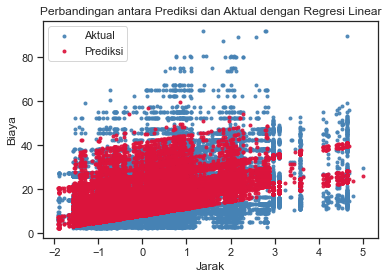

In [95]:
# melakukan visualisasi data untuk menampilkan perbandingan antara data prediksi dan aktual
fig, ax = plt.subplots()

plt.scatter(x = X_test_vis.distance, y=y_test, label = 'Aktual', c = 'steelblue',  marker='.', alpha = 0.9)
plt.scatter(x = X_test_vis.distance, y=y_pred1, label = 'Prediksi', c = 'crimson', marker='.', alpha = 0.9)

plt.title('Perbandingan antara Prediksi dan Aktual dengan Regresi Linear')
plt.xlabel('Jarak')
plt.ylabel('Biaya')
plt.legend(loc = 'best')
plt.show()

#### Evaluasi model kedua : Decision Tree

In [96]:
y_pred2 = model_2.predict(X_test)

lr_train_2 = model_2.score(X_train, y_train)
lr_test_2 = model_2.score(X_test, y_test)
print(f"Nilai R-squared (R2) Regresi Linier Train: {round(lr_train_2, 3)}")
print(f"Nilai R-squared (R2) Regresi Linier Test: {round(lr_test_2, 3)}")

mae_2 = mean_absolute_error(y_test, y_pred2)
rootmae_2 = np.sqrt(mae_2)
print(f"Nilai MAE (Mean-Absolute-Error): {round(mae_2, 3)}")

mse_2 = mean_squared_error(y_test, y_pred2)
rootmse_2 = np.sqrt(mse_2)
print(f"Nilai MSE (Mean-Squared-Error) : {round(mse_2, 3)}")
print(f"Nilai RMSE (Root-MSE): {round(rootmse_2, 3)}")

Nilai R-squared (R2) Regresi Linier Train: 0.973
Nilai R-squared (R2) Regresi Linier Test: 0.969
Nilai MAE (Mean-Absolute-Error): 1.025
Nilai MSE (Mean-Squared-Error) : 2.719
Nilai RMSE (Root-MSE): 1.649


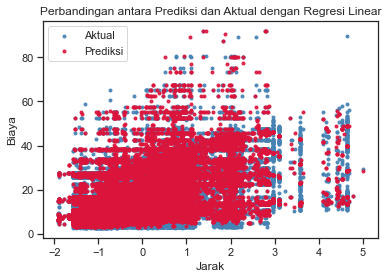

In [97]:
# melakukan visualisasi data untuk menampilkan perbandingan antara data prediksi dan aktual
fig_2, ax_2 = plt.subplots()

plt.scatter(x = X_test_vis.distance, y=y_test, label = 'Aktual', c = 'steelblue',  marker='.', alpha = 0.9)
plt.scatter(x = X_test_vis.distance, y=y_pred2, label = 'Prediksi', c = 'crimson', marker='.', alpha = 0.9)

plt.title('Perbandingan antara Prediksi dan Aktual dengan Regresi Linear')
plt.xlabel('Jarak')
plt.ylabel('Biaya')
plt.legend(loc = 'best')
plt.show()

#### Evaluasi model ketiga : Random Forest

In [98]:
y_pred3 = model_3.predict(X_test)

lr_train_3 = model_3.score(X_train, y_train)
lr_test_3 = model_3.score(X_test, y_test)
print(f"Nilai R-squared (R2) Regresi Linier trainTrain: {round(lr_train_3, 3)}")
print(f"Nilai R-squared (R2) Regresi Linier Test: {round(lr_test_3, 3)}")

mae_3 = mean_absolute_error(y_test, y_pred3)
rootmae_3 = np.sqrt(mae_3)
print(f"Nilai MAE (Mean-Absolute-Error): {round(mae_3, 3)}")

mse_3 = mean_squared_error(y_test, y_pred3)
rootmse_3 = np.sqrt(mse_3)
print(f"Nilai MSE (Mean-Squared-Error) : {round(mse_3, 3)}")
print(f"Nilai RMSE (Root-MSE): {round(rootmse_3, 3)}")

Nilai R-squared (R2) Regresi Linier trainTrain: 0.973
Nilai R-squared (R2) Regresi Linier Test: 0.97
Nilai MAE (Mean-Absolute-Error): 1.022
Nilai MSE (Mean-Squared-Error) : 2.641
Nilai RMSE (Root-MSE): 1.625


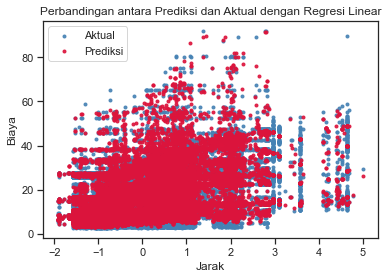

In [99]:
# melakukan visualisasi data untuk menampilkan perbandingan antara data prediksi dan aktual
fig_3, ax_3 = plt.subplots()

plt.scatter(x = X_test_vis.distance, y=y_test, label = 'Aktual', c = 'steelblue',  marker='.', alpha = 0.9)
plt.scatter(x = X_test_vis.distance, y=y_pred3, label = 'Prediksi', c = 'crimson', marker='.', alpha = 0.9)

plt.title('Perbandingan antara Prediksi dan Aktual dengan Regresi Linear')
plt.xlabel('Jarak')
plt.ylabel('Biaya')
plt.legend(loc = 'best')
plt.show()

#### Evaluasi model keempat : Gradient Boosting

In [100]:
y_pred4 = model_4.predict(X_test)

lr_train_4 = model_4.score(X_train, y_train)
lr_test_4 = model_4.score(X_test, y_test)
print(f"Nilai R-squared (R2) Regresi Linier Train: {round(lr_train_4, 3)}")
print(f"Nilai R-squared (R2) Regresi Linier Test: {round(lr_test_4, 3)}")

mae_4 = mean_absolute_error(y_test, y_pred4)
rootmae_4 = np.sqrt(mae_4)
print(f"Nilai MAE (Mean-Absolute-Error): {round(mae_4, 3)}")

mse_4 = mean_squared_error(y_test, y_pred4)
rootmse_4 = np.sqrt(mse_4)
print(f"Nilai MSE (Mean-Squared-Error) : {round(mse_4, 3)}")
print(f"Nilai RMSE (Root-MSE): {round(rootmse_4, 3)}")

Nilai R-squared (R2) Regresi Linier Train: 0.958
Nilai R-squared (R2) Regresi Linier Test: 0.959
Nilai MAE (Mean-Absolute-Error): 1.285
Nilai MSE (Mean-Squared-Error) : 3.606
Nilai RMSE (Root-MSE): 1.899


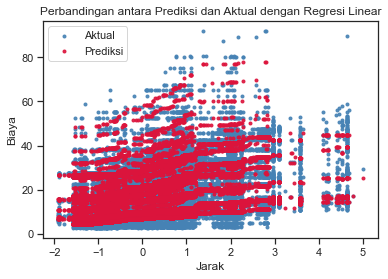

In [101]:
# melakukan visualisasi data untuk menampilkan perbandingan antara data prediksi dan aktual
fig_4, ax_4 = plt.subplots()

plt.scatter(x = X_test_vis.distance, y=y_test, label = 'Aktual', c = 'steelblue',  marker='.', alpha = 0.9)
plt.scatter(x = X_test_vis.distance, y=y_pred4, label = 'Prediksi', c = 'crimson', marker='.', alpha = 0.9)

plt.title('Perbandingan antara Prediksi dan Aktual dengan Regresi Linear')
plt.xlabel('Jarak')
plt.ylabel('Biaya')
plt.legend(loc = 'best')
plt.show()

In [102]:
# membuat dataframe baru untuk kebutuhan analisis data
index_data=['Linear Regression', 'Decision Tree', 'Random Forest','Gradient Boosting']
data_evaluation={"R2 Train":[round(lr_train_1, 3), round(lr_train_2, 3), round(lr_train_3, 3), round(lr_train_4, 3)],
      "R2 Test":[round(lr_test_1, 3), round(lr_test_2, 3), round(lr_test_3, 3), round(lr_test_4, 3)],
      "MAE":[round(mae_1, 3), round(mae_2, 3), round(mae_3, 3), round(mae_4, 3)],
      "MSE":[round(mse_1, 3), round(mse_2, 3), round(mse_3, 3), round(mse_4, 3)],
      "RMSE" : [round(rootmse_1, 3), round(rootmse_2, 3), round(rootmse_3, 3), round(rootmse_4, 3)]}
result=pd.DataFrame(data=data_evaluation,index=index_data)
result

,R2 Train,R2 Test,MAE,MSE,RMSE
Linear Regression,0.514,0.517,5.157,42.118,6.490
Decision Tree,0.973,0.969,1.025,2.719,1.649
Random Forest,0.973,0.970,1.022,2.641,1.625
Gradient Boosting,0.958,0.959,1.285,3.606,1.899


**Analisis:** Diperoleh nilai-nilai metrik evaluasi R-squared (R2) Train, R-squared (R2) Test, MAE (Mean-Absolute-Error), MSE (Mean-Squared-Error), dan RMSE (Root-MSE) untuk setiap model. Berdasarkan tujuan dari proyek ini yaitu mengimplementasikan model prediksi menggunakan Linear Regression, sehingga model yang digunakan yaitu model pertama. Model Random Forest dapat digunakan untuk analisis lebih lanjut diluar proyek ini.

---
## Model Inference

Bagian ini diisi dengan model inference, di mana model yang sudah kita
latih akan dicoba pada data selain data yang sudah tersedia.

In [103]:
new_data = {'cab_type' : [0, 0, 1], 'name' : [1,3,1], 'source' : [1, 2, 3],
            'destination' : [4, 5, 9], 'distance' : [1.25, 0.86, 0.77], 'surge_multiplier' : [1.25, 1.25, 2.18]}
new_data = pd.DataFrame(new_data)

In [104]:
y_pred_new1 = model_1.predict(new_data)
print(f"Hasil prediksi biaya perjalanan: {y_pred_new1}")

Hasil prediksi biaya perjalanan: [17.5932982   5.1865643  19.50565797]


---
## Conclusion

Berdasarkan pengolahan analisis data yang telah dilakukan, diperoleh kesimpulan bahwa:
- Menggunakan 6 fitur yang paling berkorelasi terhadap biaya pemesanan taksi online untuk melakukan prediksi data baru.
- Faktor-faktor yang berpengaruh secara signifikan terhadap biaya pemesanan taksi online, antara lain fitur cab_type (jenis taksi), name (model taksi), source (asal), destination (tujuan), distance (jarak), dan surge_multiplier (pengganda lonjakan biaya).
- Model Linear Regression menjadi model yang digunakan untuk melakukan prediksi biaya pemesanan taksi Uber dan Lyft.
- Penggunaan model Random Forest dapat dijadikan alternatif lain karena memiliki nilai metrik evaluasi yang baik.

---

In [105]:
pickle.dump(model_1, open('model_linear.pkl', 'wb'))